<a href="https://colab.research.google.com/github/roheelislam/ML-detect_anomalies_in_system-logs_identify_potential_incidents/blob/main/detect_anomalies_in_system_logs_identify_potential_incidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Number of anomalies detected: 50


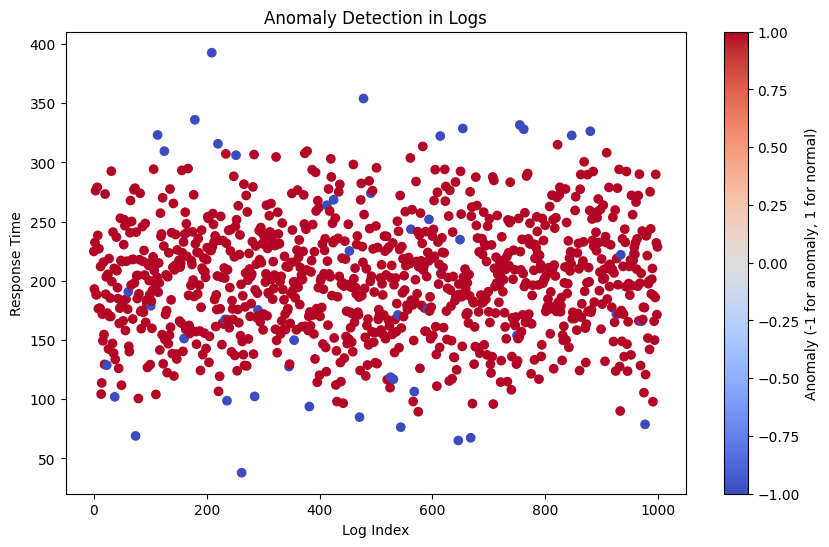

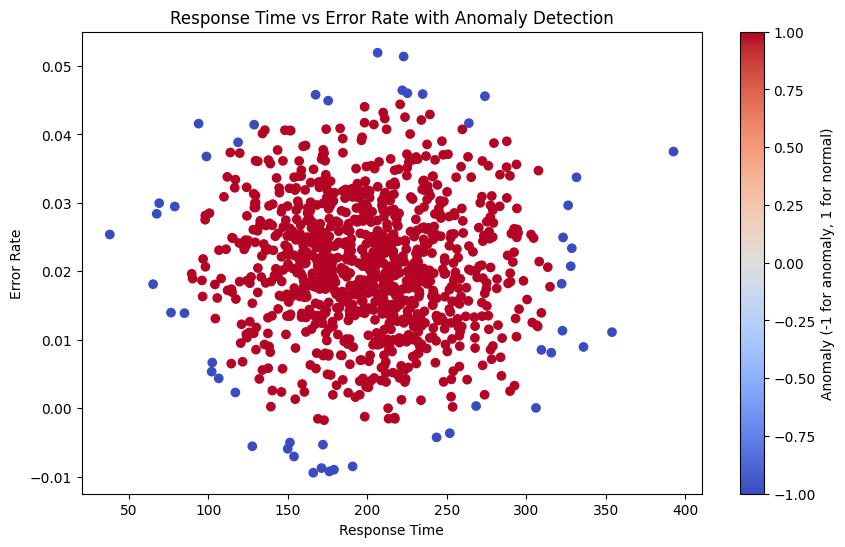

Summary of Detected Anomalies:
       response_time  error_rate  anomaly
count      50.000000   50.000000     50.0
mean      200.751594    0.018229     -1.0
std        96.601389    0.020101      0.0
min        37.936633   -0.009404     -1.0
25%       117.348717    0.000131     -1.0
50%       177.542431    0.016053     -1.0
75%       298.080159    0.037316     -1.0
max       392.636575    0.051931     -1.0
Percentage of anomalies: 5.00%
Data with anomalies saved to 'system_logs_with_anomalies.csv'


In [ ]:
# Install necessary libraries
!pip install pandas numpy matplotlib scikit-learn

# Import libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Generate synthetic log data
np.random.seed(42)
data = pd.DataFrame({
    'response_time': np.random.normal(loc=200, scale=50, size=1000),
    'error_rate': np.random.normal(loc=0.02, scale=0.01, size=1000)
})

# Select features for anomaly detection
features = data[['response_time', 'error_rate']]

# Normalize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Train the Isolation Forest model
model = IsolationForest(contamination=0.05, random_state=42)
model.fit(features_scaled)

# Predict anomalies
data['anomaly'] = model.predict(features_scaled)

# Separate anomalies and normal points
anomalies = data[data['anomaly'] == -1]  # -1 indicates anomalies
print(f"Number of anomalies detected: {len(anomalies)}")

# Plot: Log Index vs Response Time with Anomalies
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['response_time'], c=data['anomaly'], cmap='coolwarm')
plt.title('Anomaly Detection in Logs')
plt.xlabel('Log Index')
plt.ylabel('Response Time')
plt.colorbar(label='Anomaly (-1 for anomaly, 1 for normal)')
plt.show()

# Plot: Response Time vs Error Rate with Anomalies
plt.figure(figsize=(10, 6))
plt.scatter(data['response_time'], data['error_rate'], c=data['anomaly'], cmap='coolwarm')
plt.title('Response Time vs Error Rate with Anomaly Detection')
plt.xlabel('Response Time')
plt.ylabel('Error Rate')
plt.colorbar(label='Anomaly (-1 for anomaly, 1 for normal)')
plt.show()

# Summary of Anomalies
print("Summary of Detected Anomalies:")
print(anomalies.describe())

# Percentage of anomalies
anomaly_percentage = len(anomalies) / len(data) * 100
print(f"Percentage of anomalies: {anomaly_percentage:.2f}%")

# Save the DataFrame with anomalies to a CSV file
data.to_csv('system_logs_with_anomalies.csv', index=False)
print("Data with anomalies saved to 'system_logs_with_anomalies.csv'")
